# Описание проекта

Нужно выявить определяющие успешность игры закономерности для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

# Описание данных

* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

Прочитаем данные.

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

Напишем фукнцию inf для быстрого вывода определенной информации таблицы.

In [3]:
def inf(data: 'DataFrame'):
    print()
    print('Описание данных таблицы')
    print(data.info())
    print('====================================================================')
    print('Процент пропусков в таблице')
    print(data.isna().mean())
    print('====================================================================')
    print('Проверка на дубликаты')
    print(data.duplicated().sum())
    print('====================================================================')
    print('Основные статистические данные')
    print(data.describe())
    print('====================================================================')
    print('Визуальный осмотр данных таблицы')
    display(data.sample(5))

In [4]:
inf(df_games)


Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Процент пропусков в таблице
Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64
Про

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2421,Madden Football 64,N64,1997.0,Sports,0.81,0.04,0.00,0.01,NaN,NaN,NaN
3186,Far Cry 4,PC,2014.0,Shooter,0.15,0.44,0.00,0.04,80.0,6.7,M
6268,Trivial Pursuit,PS2,2009.0,Misc,0.09,0.01,0.00,0.17,NaN,tbd,E
11803,Gundam Battle Tactics,PSP,2005.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
5936,Harry Potter and the Order of the Phoenix,X360,2007.0,Action,0.24,0.03,0.00,0.02,68.0,6.8,E10+


### Вывод

Перед нами таблица с 16715 строками. В ней выявились пропуски в некоторых столбцах, а именно:
* `Name` - 0.012%;
* `Year_of_Release` - 1.6093%;
* `Genre` - 0.012%;
* `Critic_Score` - 51.3192%;
* `User_Score` - 40.0897%;
* `Rating` - 40.4786%.

Пока проверка на дубликаты их не выявила. Потом проверим еще раз после приведения всех данных к нижнему регистру и проверки правильности написания категориальных переменных.

До предобработки статистические данные нам мало о чем говорят.

Для проведения анализа нужно провести предобратку данных, устранив следующие проблемы:
* привести все названия столбцов к нижнему регистру;
* привести все категориальные переменные к нижнему регистру;
* изменить тип данных переменных в столбце `Year_of_Release` с `float64` на `int64`;
* изменить тип данных переменных в столбце `User_Score` с `object` на `float64`, узнав почему эта переменная имела такой тип данных;
* проанализировать пропуски.

## Предобработка данных

Приведем все названия столбцов к нижнему регистру.

In [5]:
df_games.columns = map(str.lower, df_games.columns)

Приведем все категориальные переменные к нижнему регистру.

In [6]:
df_games['name'] = df_games['name'].str.lower()
df_games['platform'] = df_games['platform'].str.lower()
df_games['genre'] = df_games['genre'].str.lower()
df_games['rating'] = df_games['rating'].str.lower()

Проанализируем пропуски в столбце `name`.

In [7]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Вывелось две безымянные игры с неизвестным жанром, которые вышли в 1993 году на легендарной *Sega Mega Drive*. От их отсутствия мы ничего не потеряем. Удалим эти строки.

In [8]:
df_games = df_games.dropna(subset = ['name']).reset_index(drop=True)

Проанализируем пропуски в столбце `year_of_release`.

In [9]:
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16403,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16446,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16456,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В теории можно заполнить эти пропуски, разыскав информацию об этих играх в интернете, но это слишком трудозатратный процесс в соотношении с результатом, даже если отдать эту задачу на аутсорс. Так как год выпуска игры является одной из важнейших метрик в этом проекте, то целесообразнее будет удалить эти строки, которые при этом составляют всего лишь 1.6% от всей таблицы.

In [10]:
df_games = df_games.dropna(subset = ['year_of_release']).reset_index(drop=True)

Пропуски в столбцах `critic_score`, `user_score`, `rating` запонять не будем, так как это слишком индивидуальные параметры для каждой игры, которые зависят от многих факторов, а заполнение этих пропусков может сильно исказить финальный результат исследования, также в таблице нет подходящих метрик по которым мы могли бы сгруппировать и заполнить пропуски в этих столбцах.

Изменим тип данных в столбце `year_of_release` с `float64` на `integer64`.

In [11]:
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

Посмотрим на значения переменных в столбце `user_score`.

In [12]:
df_games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
0.2       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В этом столбце присутствует значение *tbd*, причем в немалом количестве. *tbd* - это аббревиатура от английского *To Be Determined* (будет определено) или *To Be Decided* (будет решено). Это можно интепретировать, как то, что игру еще не оценило достаточное количество пользователей либо не оценило вообще. Заполнить *tbd* логичнее всего пустым значением, чтобы оно не мешало при анализе данных. Заполнить его каким-либо значением мы не можем по тем же самым причинам, как и в случае со столбцами `critic_score`, `user_score`, `rating`. 

In [13]:
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan

Теперь изменим тип данных переменных в столбце `user_score` с `object` на `float64`.

In [14]:
df_games['user_score'] = df_games['user_score'].astype(float)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.

In [15]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

Посмотрим на общие данные таблицы еще раз.

In [16]:
inf(df_games)


Описание данных таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
Процент пропусков в таблице
name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15866,katekyoo hitman reborn nerae!? ring x bongole ...,ps2,2008,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
8727,jaws unleashed,xb,2006,action,0.11,0.03,0.00,0.01,51.0,6.2,m,0.15
1755,wwe 2k15,ps4,2014,sports,0.39,0.57,0.00,0.19,62.0,5.1,t,1.15
14874,here they lie,ps4,2016,adventure,0.00,0.02,0.00,0.00,62.0,6.5,m,0.02
353,doom ii: hell on earth,pc,1994,shooter,2.05,1.40,0.00,0.16,NaN,NaN,NaN,3.61


### Вывод

В ходе предобработки данных мы сделали следующие действия:
* привели названия столбцов и все категориальные переменные к нижнему регистру;
* обработали пропуски в таблице;
* разобрались с выбивающейся из общей картины переменной *tbd* в столбце `user_score`, заменив ее на пустые значения, и поменяли тип данных этого столбца на `float64`;
* поменяли тип данных столбца `year_of_release` на `int64`;
* добавили столбец `total_sales`, харктеризующийся общими продажами во всех регионах.


Данные готовы к анализу!

## Исследовательский анализ данных

### "Сколько игр выпускалось в разные годы?"

Составим сводную таблицу `games_in_year`, для того, чтобы посмотреть сколько игр выпускалось в каждый из предоставленных годов.

In [17]:
games_in_year = df_games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
games_in_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Построим распределение выпущенных игр по годам.

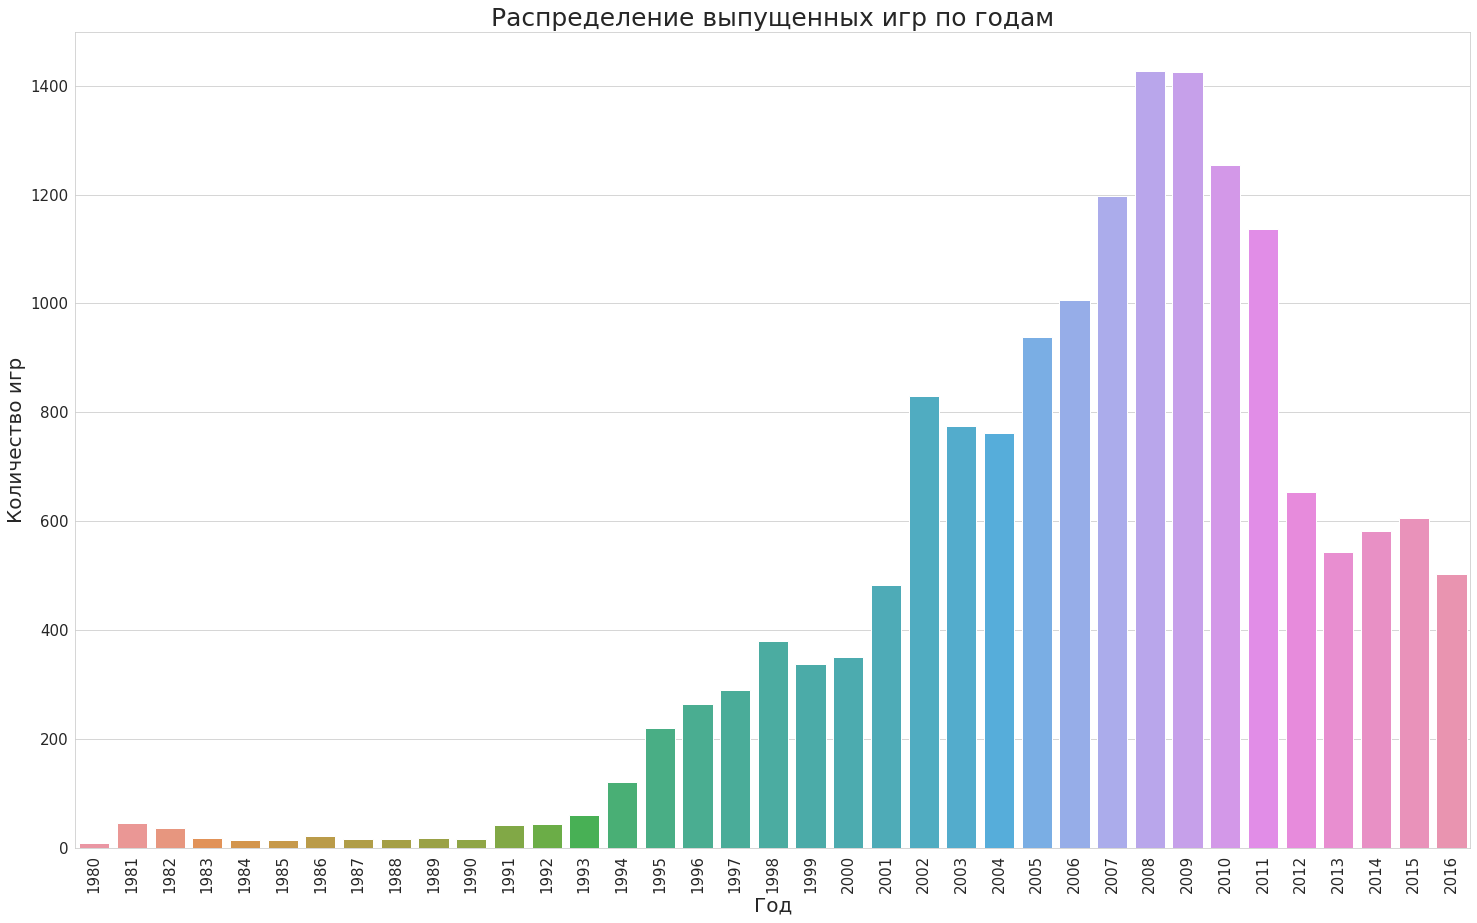

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize = (25,15))

plt.title('Распределение выпущенных игр по годам', fontsize = 25)

sns.barplot(x = 'year_of_release', y = 'name', data = games_in_year)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Количество игр', fontsize = 20)

plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)

plt.show()

Проанализируем полученную картину.
В 80-е игры были не популярны от слова совсем, так как большинство не воспринимало их всерьез и считало, что это увлечение временное и вскоре исчезнет вовсе.
В 90-е наблюдается постепенный подъем продаж, связанный с развитием технологий.
В 2002 году произошел резкий скачок продаж.
Пик наблюдается в 2008 и 2009 годах, а затем идет резкий спад и количество продаж стало даже ниже, чем в начале века. Скорее всего это связано с появлением огромного количества способов времяпровождения, например, новые социальные сети, мобильный гейминг и др.
Предварительно выберем актуальный период с 2006 года по 2016, так как в этом интервале присутствует наибольшее количество игр и за это время у общества сформировались определенные предпочтения по жанрам.

### "Как менялись продажи по платформам?"

Выявим наиболее популярные платформы по продажам, составив сводную таблицу `platform_sales`, отсортируя ее по убыванию.

In [19]:
platform_sales = df_games.pivot_table(index = 'platform', 
                                    values = 'total_sales', 
                                    aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).reset_index()
platform_sales

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


Визуализируем полученный результат.

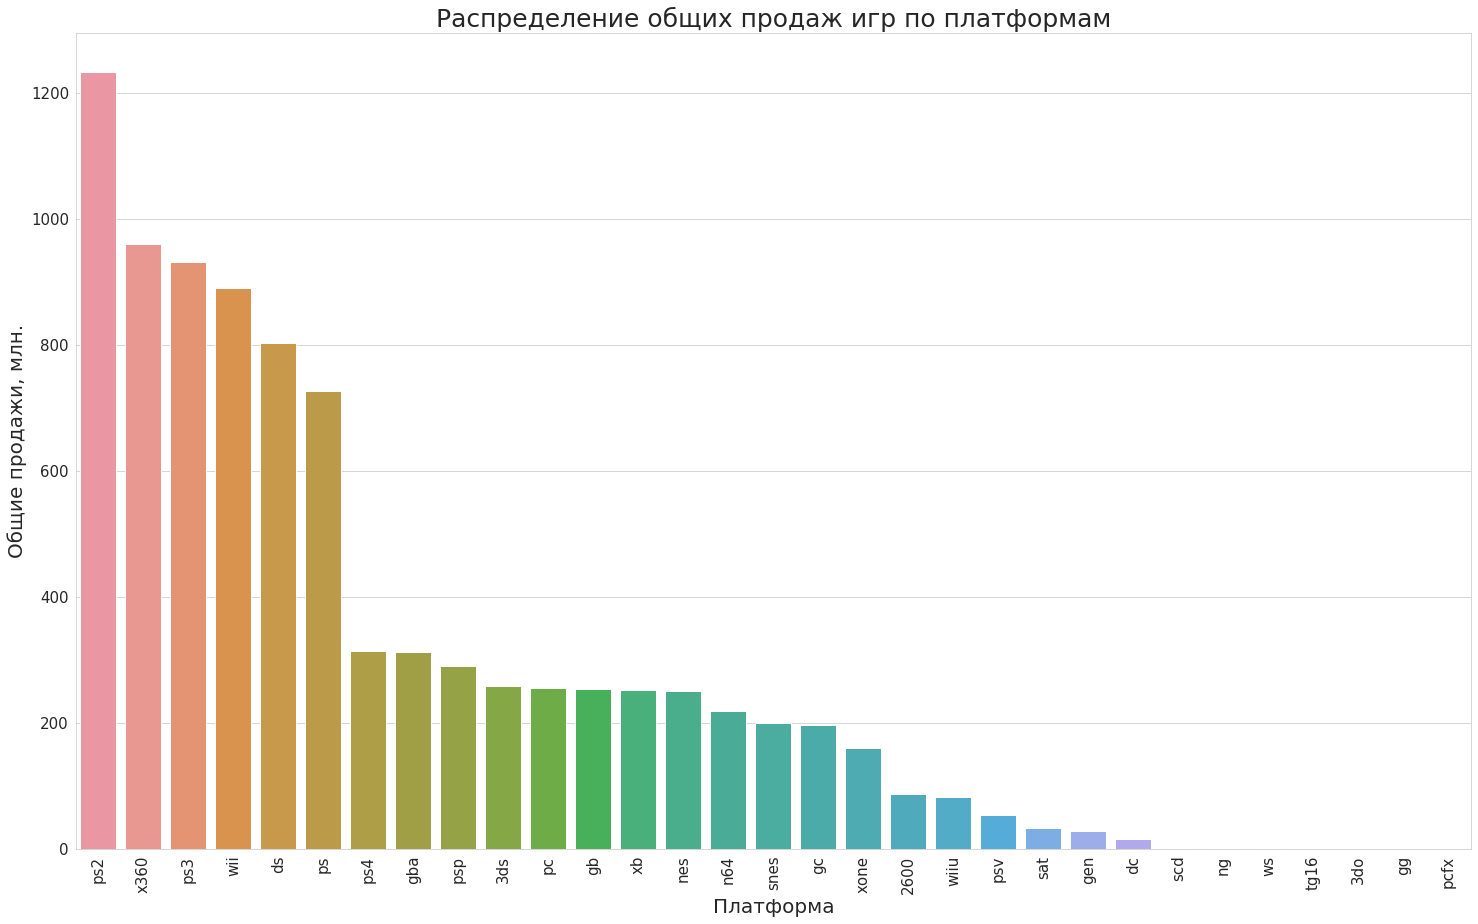

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize = (25,15))

plt.title('Распределение общих продаж игр по платформам', fontsize = 25)

sns.barplot(x = 'platform', y = 'total_sales', data = platform_sales)

plt.xlabel('Платформа', fontsize = 20)
plt.ylabel('Общие продажи, млн.', fontsize = 20)

plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)

plt.show()

Среди всех платфор наиболее популярными являются:
* PS2;
* X360;
* PS3;
* Wii;
* DS;
* PS.

Но чтобы посчитать среднюю продолжительность жизни платформ шести наименований маловато, поэтому будем рассматривать топ-10 платформ. Создадим список топ-10 платформ.

In [21]:
platform_top_10 = platform_sales.head(10).platform.to_list()
platform_top_10

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds']

Создадим сводную таблицу `platform_pivot`, где при пересечении даты и наименования платформы будет находится значение общих продаж.

In [22]:
platform_pivot = df_games.pivot_table(index = 'platform', columns = 'year_of_release', 
                                      values = 'total_sales', aggfunc = 'sum')
platform_pivot

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ds,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
gb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Таблица получилась несколько перегруженной, поэтому оставим там только топ-10 платформ.

In [23]:
for platform in platform_pivot.index:
    if platform not in platform_top_10:
        platform_pivot = platform_pivot.drop(labels = platform)
platform_pivot

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
ds,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
gba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
ps3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
ps4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
psp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


Визуализируем таблицу c помощью тепловой карты.

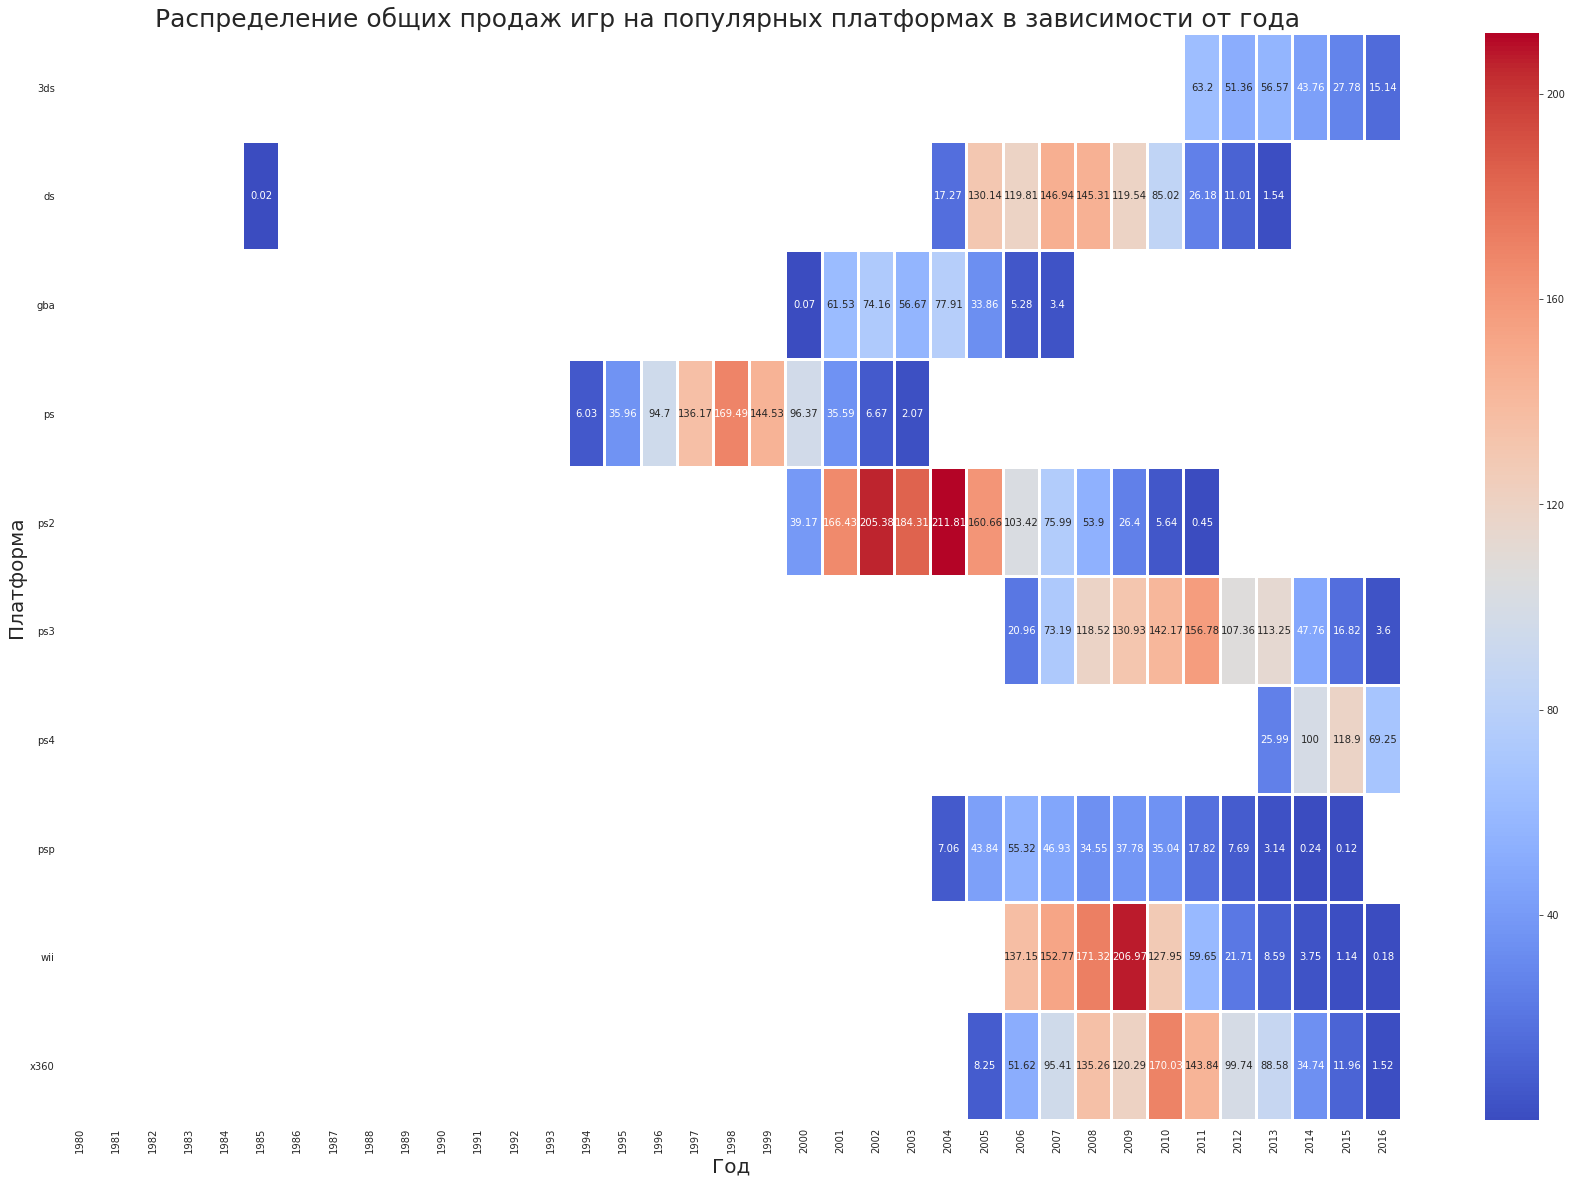

In [24]:
plt.subplots(figsize=(30, 20))
sns.heatmap(platform_pivot, annot=True, cmap="coolwarm", fmt = 'g', linewidths=2)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Платформа', fontsize = 20)

plt.title('Распределение общих продаж игр на популярных платформах в зависимости от года ', fontsize = 25)

plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

plt.show()

Видимо в данных была ошибка, так как на графике видно, что у игр на приставке DS были продажи в 1985 году, хотя она вышла в 2004, но это мало как повлияет на наш результат.

Карта получилась трудночитаемой. Для улучшения отобразим результат начиная с 1994 и заполним пропуски нулем для красоты.

In [25]:
platform_pivot_final = platform_pivot[platform_pivot.columns[platform_pivot.columns >= 1994]].fillna(0)

Отобразим финальный результат карты.

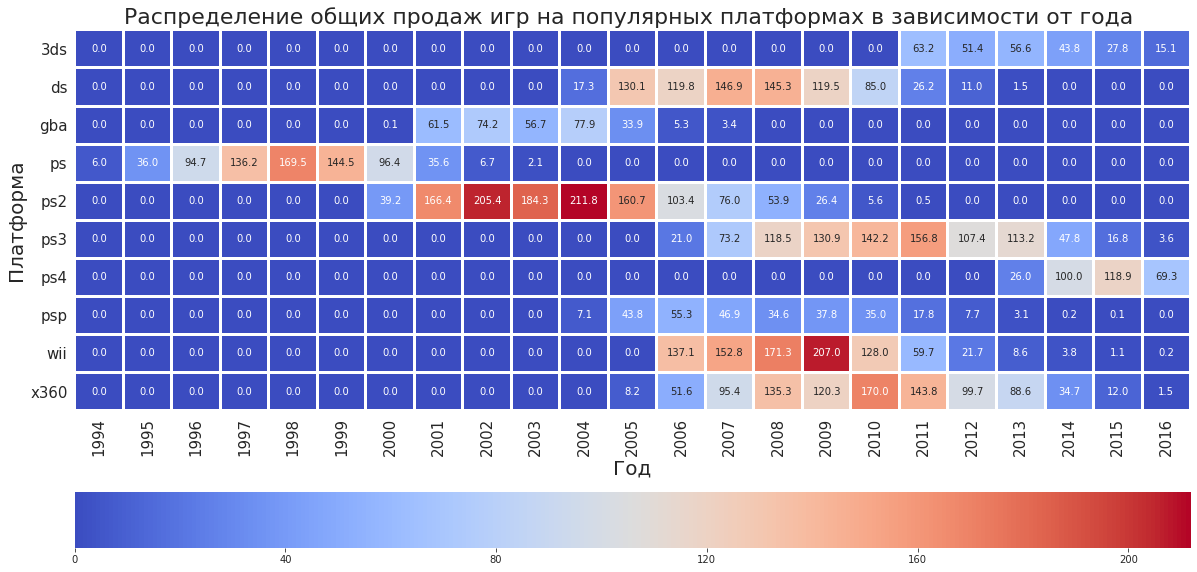

In [26]:
plt.subplots(figsize=(20, 10))
sns.heatmap(platform_pivot_final, annot=True, cmap="coolwarm", fmt = '.1f', linewidths=2, linecolor = 'white', cbar_kws= {'orientation': 'horizontal'})

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Платформа', fontsize = 20)

plt.title('Распределение общих продаж игр на популярных платформах в зависимости от года ', fontsize = 22)


plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(rotation='horizontal', fontsize = 15)


plt.show()

Здесь мы видим как с середины 90-х игры постепенно выдвигаются в массы, чему способствовал выход PS, у которой потом переняла эстафету ее преемница PS2, совершившая фурор в игровой индустрии, который никто не смог перебить за предоставленный период. Несильно выделяются представители японской игровой индустрии, кроме разве что Wii, которая заинтерисовала многих своим нестандартным способом игры. С 2006 года наблюдается практически равная борьба гигантов PS3 и X360, в которой победила последняя. С 2013 из актуальных платформ осталась только PS4, которая только начала свой подъем.

### Выбор актуального периода

Найдем среднюю продолжительность жизни платформ для окончательного выбора актуального периода. Для этого создадим пустой список `platforms_life` и будем в него добавлять количество лет, в которая каждая из платформ приносила прибыль.

In [27]:
platforms_life = []
for i in range(0, len(platform_pivot_final.index)):
    platforms_life.append(len(platform_pivot_final.values[i][platform_pivot_final.values[i] != 0]))
platforms_life

[6, 10, 8, 10, 12, 11, 4, 12, 11, 12]

Посчитаем среднее полученного списка.

In [28]:
np.mean(platforms_life)

9.6

Примерно 10 лет составляет жизнь платформы. 

Принимая во внимание все полученные результаты утвердим интервал 2013-2016 г. К 2013 пик всех популярных платформ пройдет, кроме PS4, которая только начнет свой подъем и к концу 2016 года она проживет всего лишь 4 года, то есть у этой платформы будет хороший потенциал и, как минимум, еще 6 лет развития.

### Выбор потенциально прибыльных платформ за актуальный период

Составим новую базу данных `df_games_current`, описывающую ситуацию на игровом рынке в актуальный период.

In [29]:
df_games_current = df_games[df_games['year_of_release'] >= 2013].reset_index(drop = True)
df_games_current

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2229,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2230,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2231,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Составим аналогичную сводную таблицу для актуального пеиода `platform_current`.

In [30]:
platform_current = df_games_current.pivot_table(index = 'platform', columns = 'year_of_release', 
                                                  values = 'total_sales', aggfunc = 'sum').fillna(0)
platform_current

year_of_release,2013,2014,2015,2016
platform,,,,
3ds,56.57,43.76,27.78,15.14
ds,1.54,0.00,0.00,0.00
pc,12.38,13.28,8.52,5.25
ps3,113.25,47.76,16.82,3.60
ps4,25.99,100.00,118.90,69.25
psp,3.14,0.24,0.12,0.00
psv,10.59,11.90,6.25,4.25
wii,8.59,3.75,1.14,0.18
wiiu,21.65,22.03,16.35,4.60


Визуализируем её.

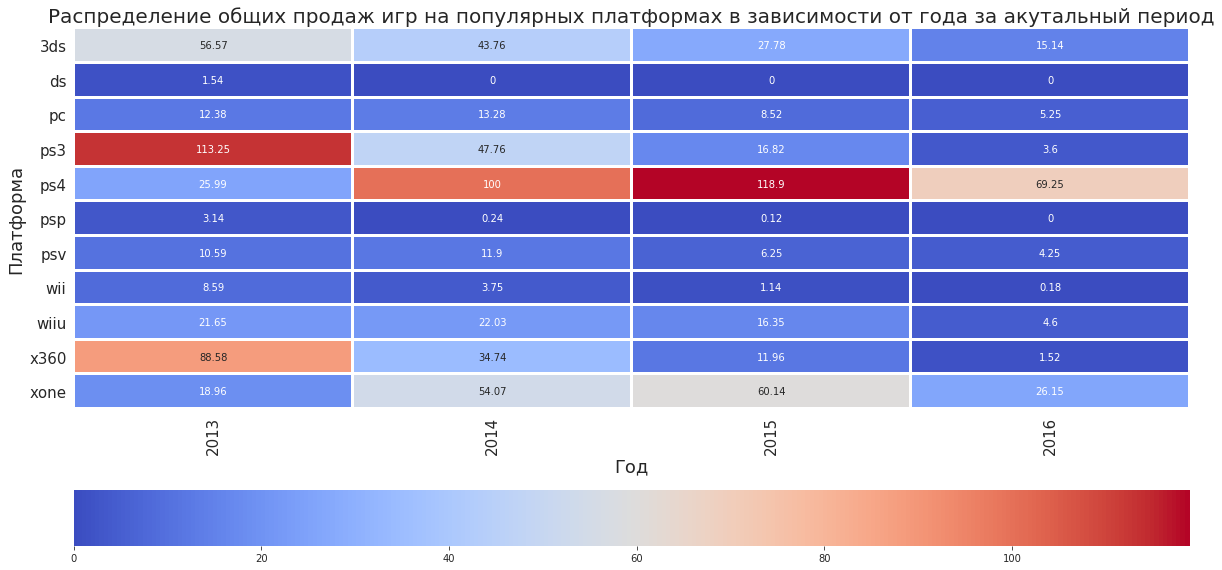

In [31]:
plt.subplots(figsize=(20, 10))
sns.heatmap(platform_current, annot=True, cmap="coolwarm", fmt = 'g', linewidths = 2, cbar_kws = {'orientation': 'horizontal'})

plt.xlabel('Год', fontsize = 18)
plt.ylabel('Платформа', fontsize = 18)

plt.title('Распределение общих продаж игр на популярных платформах в зависимости от года за акутальный период', fontsize = 20)


plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(rotation = 'horizontal', fontsize = 15)


plt.show()

По этому графическому представлению видно, что:
* платформы DS и PSP изжили себя и больше не приносят прибыли к концу 2016 года, к этому же стремится и Wii;
* 3DS просуществовала чуть больше половины высчиатной жизни платформы и постепенно продажи на нее идут на спад;
* из-за популярности игровых консолей продажи на PC постепенно падают;
* PS3 теряет свою популярность из-за выхода консолей нового поколения;
* с 2013 года по 2015 год PS4 набирала обороты по продажам, но к 2016 продажи сильно упали из-за анонса более новой ее версии;
* PS Vita прожив только половину своей жизни слишком быстро идет на спад;
* поведение продаж на платформу XONE схожи с поведение продаж на PS4, но в каждый из годов они примерно в 2 раза меньше.

Составим сводную таблицу `current_pivot`, где будут отображаться суумарные продажи на каждую из платформ.

In [32]:
current_pivot = df_games_current.pivot_table(index = 'platform',
                                             values = 'total_sales', 
                                             aggfunc = 'sum').sort_values(by = 'total_sales', 
                                                                        ascending = False)
current_pivot

,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43
psv,32.99
wii,13.66


В пятерку потенциально прибильных платфор входят:
* PS4;
* PS3;
* XONE;
* 3DS;
* X360.

Но, учитывая продолжительность жизни платформ и количество продаж в крайний год, отсюда можно смело убирать PS3 и X360. Потенциально прибильными платформами могут стать WiiU и PC, но до показателей гигантов им далеко.

Построим 'ящик с усами' по глобальным продажам игр в разбивке по платформам за актуальный период.

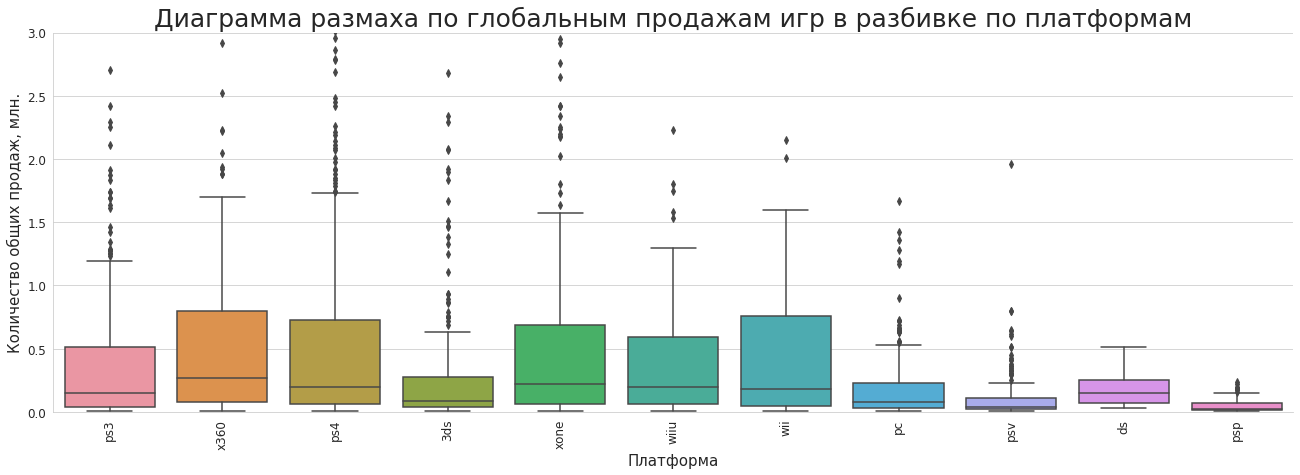

In [33]:
sns.catplot(x = 'platform', 
            y = 'total_sales', 
            kind = 'box', 
            data = df_games_current, 
            height = 6, 
            aspect = 3, 
            orient = 'v').set(ylim = (0, 3))

plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам', fontsize = 25)

plt.xlabel('Платформа', fontsize = 15)
plt.ylabel('Количество общих продаж, млн.', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 12)
plt.yticks(rotation = 'horizontal', fontsize = 12)

plt.show()

На диаграмме сразу же в глаза бросаются выбросы. Они характеризуют хиты продаж на каждую из платформ. Также здесь отчетливо видны топ-5 платформ по продажам, определенные ранее, которые характеризуются более широкими границами продаж.

### Зависимость между продажами внутри платформ и отзывами критиков с пользователями

Напишем функцию `corr_sales_score`, которая выводит точечные графики, где показывается соотношение между продажами внутри платформ и отзывами критиков с пользователями, и коэффициент корреляции. Переменной функции является исследуемая платформа.

In [34]:
def corr_sales_score(platforms):
    sns.relplot(data = df_games_current[df_games_current['platform'] == platforms], x = 'critic_score', y = 'total_sales')
    plt.title('Зависимость между продажами внутри платформы {} и отзывами критиков'.format(platforms), fontsize = 15)

    plt.xlabel('Оценка критиков', fontsize = 10)
    plt.ylabel('Количество общих продаж, млн.', fontsize = 10)

    plt.show()
    print('Коэффициент Пирсона: {:.2}'.format(df_games_current['critic_score'][df_games_current['platform'] == platforms].corr(df_games_current['total_sales'][df_games_current['platform'] == platforms])))

    sns.relplot(data = df_games_current[df_games_current['platform'] == platforms], x = 'user_score', y = 'total_sales')
    plt.title('Зависимость между продажами внутри платформы {}  и отзывами пользователей'.format(platforms), fontsize = 15)

    plt.xlabel('Оценка пользователей', fontsize = 10)
    plt.ylabel('Количество общих продаж, млн.', fontsize = 10)

    plt.show()
    print('Коэффициент Пирсона: {:.2}'.format(df_games_current['user_score'][df_games_current['platform'] == platforms].corr(df_games_current['total_sales'][df_games_current['platform'] == platforms])))

Применим функцию к топ-1 популярных платформ - PS4.

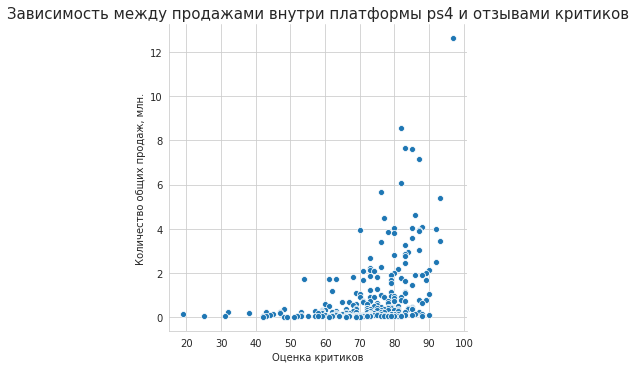

Коэффициент Пирсона: 0.41


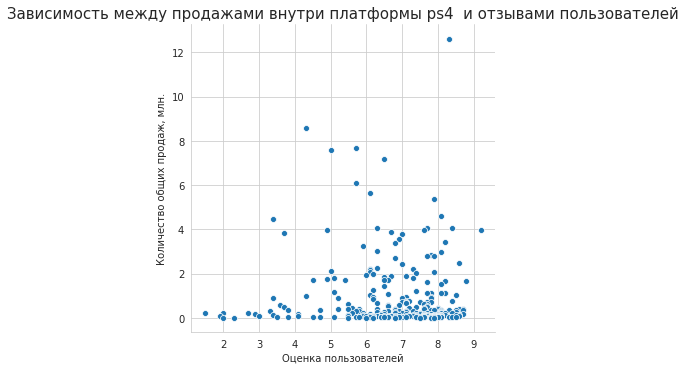

Коэффициент Пирсона: -0.032


In [35]:
corr_sales_score('ps4')

Видно, что покупатели, в основном, прислушиваются к мнению критиков: чем выше оценка от критиков, тем больше продаж у игры. Этот тезис также подтверждает коэффициент Пирсона, который показывает насколько линейна зависимость между переменными.

Зависимость между продажами и оценками пользователей несколько хаотична. Покупатели не доверяют пользователям, которые зачастую не объективны в своих суждениях. Это также подтверждает довольно малый коэффициент Пирсона, который очень близок к нулю.

Для подтверждения этого вывода рассмотрим другие топовые платформы.
Применим эту функцию к платформе PS3.

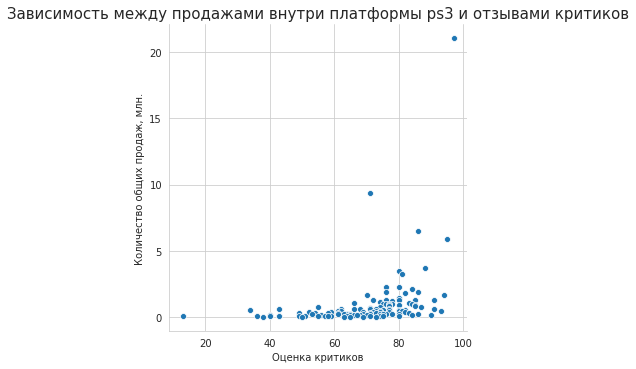

Коэффициент Пирсона: 0.33


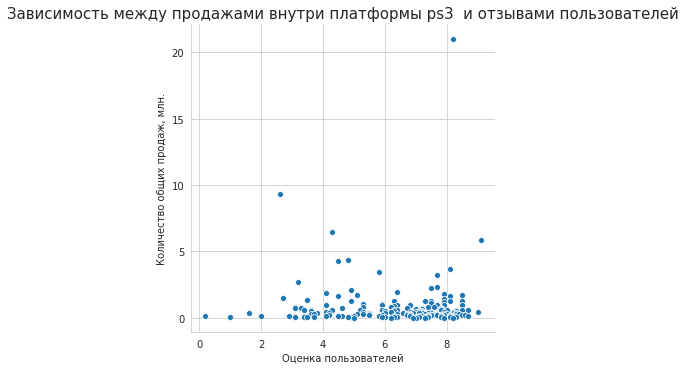

Коэффициент Пирсона: 0.0024


In [36]:
corr_sales_score('ps3')

Ситуация аналогична.

Рассмотрим платформу XONE.

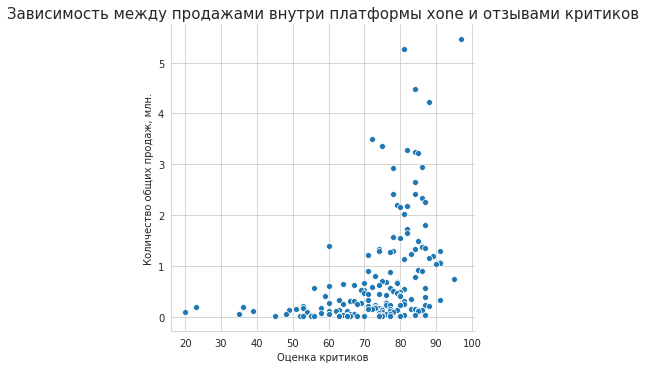

Коэффициент Пирсона: 0.42


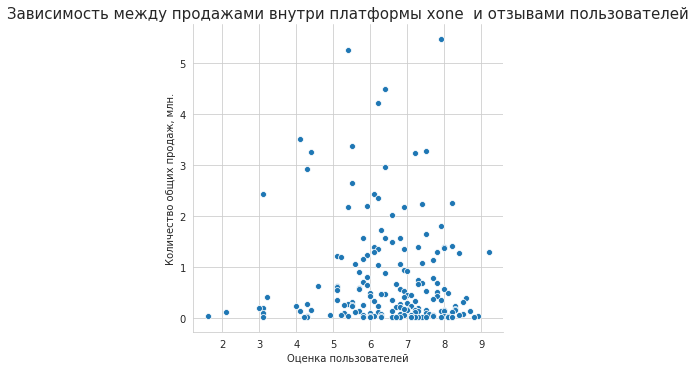

Коэффициент Пирсона: -0.069


In [37]:
corr_sales_score('xone')

Ситуация аналогична.

Рассмотрим платформу 3DS.

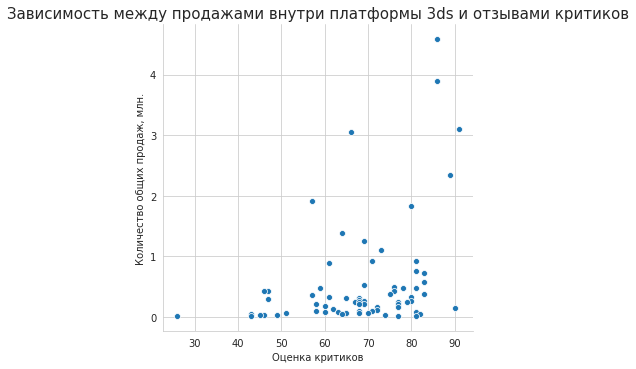

Коэффициент Пирсона: 0.36


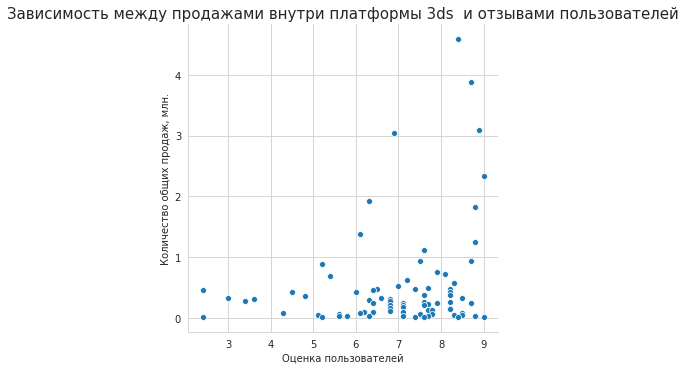

Коэффициент Пирсона: 0.24


In [38]:
corr_sales_score('3ds')

Ситуация аналогична.

Рассмотрим платформу X360.

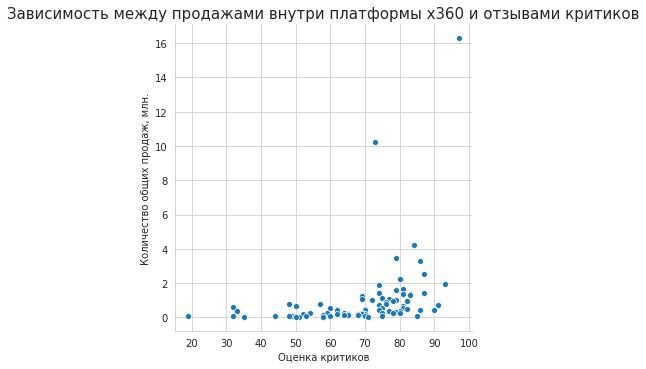

Коэффициент Пирсона: 0.35


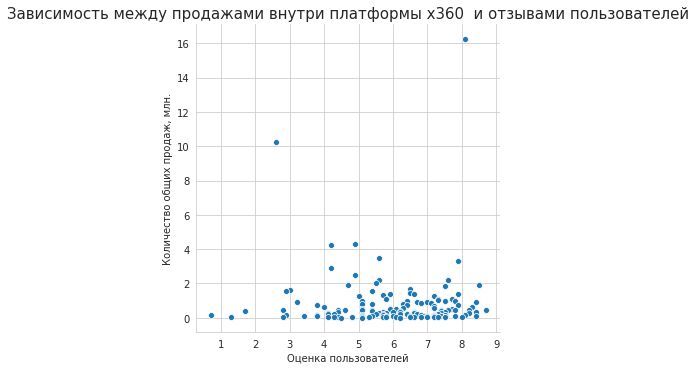

Коэффициент Пирсона: -0.012


In [39]:
corr_sales_score('x360')

Ситуация аналогична.

### Распределение игр по жанрам

Составим сводную таблицу `genre_pivot`, где к каждому из жанров будет предоставлена информация о количестве продаж и количестве игр соответсвующего жанра.

In [40]:
genre_pivot = df_games_current.pivot_table(index = 'genre', 
                                   values = 'total_sales', 
                                   aggfunc = ['sum', 'count'])

genre_pivot.columns = ['total_sales', 'number_of_games']

genre_pivot = genre_pivot.sort_values(by = 'total_sales', ascending = False).reset_index()

genre_pivot

,genre,total_sales,number_of_games
0,action,321.87,766
1,shooter,232.98,187
2,sports,150.65,214
3,role-playing,145.89,292
4,misc,62.82,155
5,platform,42.63,74
6,racing,39.89,85
7,fighting,35.31,80
8,adventure,23.64,245
9,simulation,21.76,62


Пересоберем таблицу для удобства визуализации.

In [41]:
genre_pivot_melt = pd.melt(genre_pivot, id_vars="genre", var_name="value", value_name="amount")
genre_pivot_melt

,genre,value,amount
0,action,total_sales,321.87
1,shooter,total_sales,232.98
2,sports,total_sales,150.65
3,role-playing,total_sales,145.89
4,misc,total_sales,62.82
5,platform,total_sales,42.63
6,racing,total_sales,39.89
7,fighting,total_sales,35.31
8,adventure,total_sales,23.64
9,simulation,total_sales,21.76


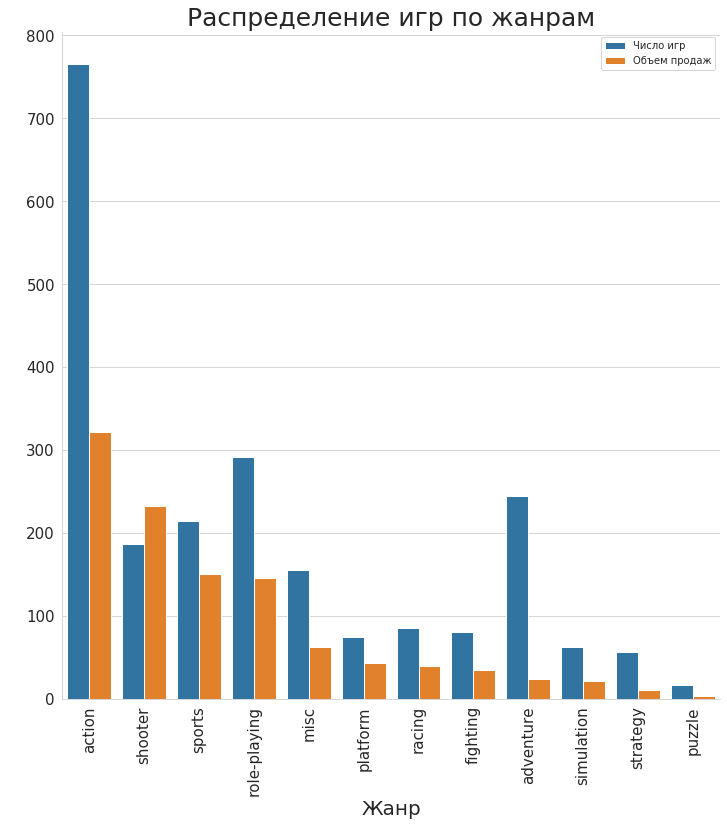

In [42]:
ax = sns.factorplot(x = 'genre', y = 'amount', hue = 'value', data = genre_pivot_melt, kind = 'bar', 
               hue_order = ['number_of_games', 'total_sales'], height = 10, legend_out=False)

l = ax.axes[0][0].legend()
l.texts[0].set_text('Число игр')
l.texts[1].set_text('Объем продаж')

plt.title('Распределение игр по жанрам', fontsize = 25)

plt.xlabel('Жанр', fontsize = 20)
plt.ylabel(' ', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(rotation = 'horizontal', fontsize = 15)

plt.show()

По объемам продаж лидируют игры со следующими жанрами:
* Action;
* Shooter;
* Sports;
* Role-playing.

Самыми непополярными играми по жанрам являются:
* Puzzle;
* Strategy;
* Simulation.
    
Для более ясной картины рассмотрим диграмму размаха объема продаж игр по жанрам.

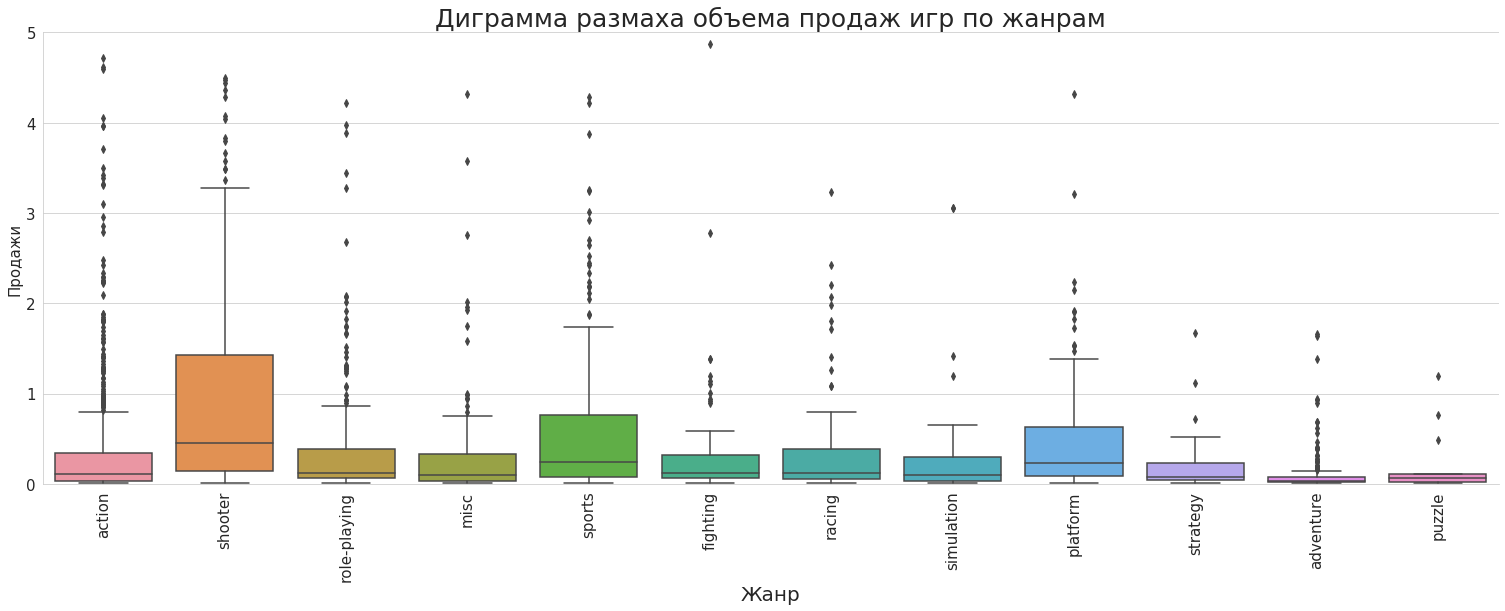

In [43]:
sns.catplot(x = 'genre', y = "total_sales", kind = "box", data = df_games_current, height = 7, aspect = 3).set(ylim = (0, 5))

plt.title('Диграмма размаха объема продаж игр по жанрам', fontsize = 25)

plt.xlabel('Жанр', fontsize = 20)
plt.ylabel('Продажи', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(rotation = 'horizontal', fontsize = 15)

plt.show()

Здесь ситуация более проясняется. Видимо игры с жанром Action продались больше остальных за счет большого количества игр и немалого числа бестселлеров, а медианное значение их продаж меньше, чем у жанров Shooter, Sports и Platform. Жанр Shooter же занимает первое место по медианному значению продаж, имея при этом наибольший межквартальный размах.
    
При довольно немалом количестве игр с жанром Adventure, они набрали одно из самих меньших количество продаж в основном только за счет бестселлеров.
    
Игры с жанром Role-Playing имеют сходтство с играми жанра Action в том, что они имеют почти одинаковую популярность по продажам.
    
В целом топ популярных жанров не поменялся. Разве что, игры с жанрами Shooter и Sports имеют большую популярность по продажам в сравнении с жанром Action.

### Вывод

В ходе анализа данных мы выяснили, что:
* в 2008 и 2009 годах выпускалось наибольшее количество игр;
* самыми популярными платформами с 1980 по 2016 являются:
    * PS2;
    * X360;
    * PS3;
    * Wii;
    * DS;
    * PS.
* примерная средняя продолжительность жизни платформы равна 10 лет;
* для дальнейшего исследования лучше принять актуальный период 2013-2016;
* потенциально прибыльными платформами являются:
    * PS4;
    * XONE;
    * 3DS.
* покупатели больше доверяют оценкам критиков, а не пользователей;
* самыми популярными жанрами являются:
    * Action;
    * Sport;
    * Shooter.

## Портрет пользователя каждого региона

### Топ-5 платформ каждого региона

Составим словарь `region_dict`.

In [46]:
region_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}

Автматизируем построение распределений общих продаж игр по топ-5 платформам в каждом из регионов и выводом таблицы с долей продаж с помощью функции `platform_region`.

In [47]:
def platform_region(region):

    reg_platform = df_games_current.pivot_table(index = 'platform', 
                                           values = region, 
                                           aggfunc = 'sum').reset_index().sort_values(by = region,
                                                                                      ascending = False)
    reg_platform = reg_platform.head(5).reset_index(drop = True)

    sns.set_style('whitegrid')
    plt.figure(figsize = (5,3))

    plt.title('Топ-5 платформ в регионе {}'.format(region_dict[region]), fontsize = 10)

    sns.barplot(x = 'platform', y = region, data = reg_platform)

    plt.xlabel('Платформа', fontsize = 8)
    plt.ylabel('Общие продажи, млн.', fontsize = 8)

    plt.xticks(rotation = 45, fontsize = 8)
    plt.yticks(rotation = 'horizontal', fontsize = 8)
    
    plt.show()
    
    reg_platform['ratio'] = round(reg_platform[region] / reg_platform[region].sum(), 2)
    
    print('Доля продаж')
    
    display(reg_platform)
    
    print('=============================================')

Применим функцию.

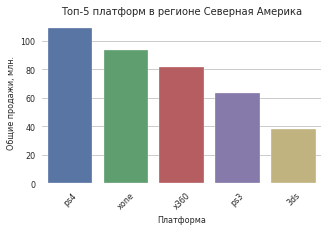

Доля продаж


,platform,na_sales,ratio
0,ps4,108.74,0.28
1,xone,93.12,0.24
2,x360,81.66,0.21
3,ps3,63.50,0.16
4,3ds,38.20,0.10


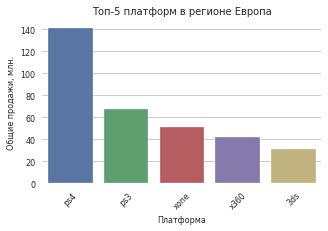

Доля продаж


,platform,eu_sales,ratio
0,ps4,141.09,0.42
1,ps3,67.81,0.20
2,xone,51.59,0.15
3,x360,42.52,0.13
4,3ds,30.96,0.09


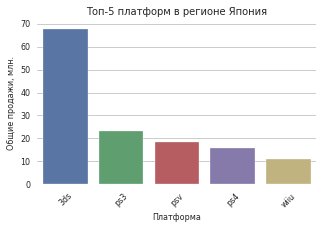

Доля продаж


,platform,jp_sales,ratio
0,3ds,67.81,0.50
1,ps3,23.35,0.17
2,psv,18.59,0.14
3,ps4,15.96,0.12
4,wiiu,10.88,0.08


In [48]:
for region in region_dict.keys():
    platform_region(region)

С выходом нового поколения консолей американцы и европейцы вывели на первой место PS4. Также можно заметить, что немалая часть покупателей из Америки предпочитают консоли линейки Xbox, в отличие от покупателей из Европы, где XOne даже не обогнала по продажам устаревшую PS3. Игрокам из этих регионов больше нрафится стационарные консоли, чем портативные, о чем говорит 3DS на последнем месте. У вечно занятых японцев же 3DS на первом месте , как и PSVita на третьем. Выход нового поколения консолей в Японии много шуму не наделал. Интересно еще то, что в топе Японии находятся только японские платформы.

### Топ-5 жанров каждого региона

Напишем аналогичную функцию `genre_region` только для жанров.

In [49]:
def genre_region(region):

    reg_genre = df_games_current.pivot_table(index = 'genre', 
                                           values = region, 
                                           aggfunc = 'sum').reset_index().sort_values(by = region,
                                                                                      ascending = False)
    reg_genre = reg_genre.head(5).reset_index(drop = True)

    sns.set_style('whitegrid')
    plt.figure(figsize = (5,3))

    plt.title('Топ-5 жанров в регионе {}'.format(region_dict[region]), fontsize = 10)

    sns.barplot(x = 'genre', y = region, data = reg_genre)

    plt.xlabel('Жанр', fontsize = 8)
    plt.ylabel('Общие продажи, млн.', fontsize = 8)

    plt.xticks(rotation = 45, fontsize = 8)
    plt.yticks(rotation = 'horizontal', fontsize = 8)
    
    plt.show()
    
    reg_genre['ratio'] = round(reg_genre[region] / reg_genre[region].sum(), 2)
    
    print('Доля продаж')
    
    display(reg_genre)
    
    print('=============================================')

Применим функцию.

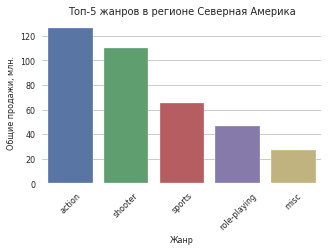

Доля продаж


,genre,na_sales,ratio
0,action,126.05,0.34
1,shooter,109.74,0.29
2,sports,65.27,0.17
3,role-playing,46.40,0.12
4,misc,27.49,0.07


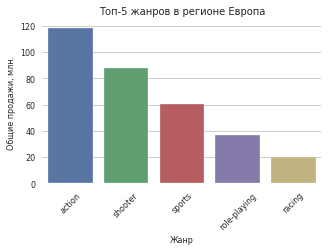

Доля продаж


,genre,eu_sales,ratio
0,action,118.13,0.36
1,shooter,87.86,0.27
2,sports,60.52,0.19
3,role-playing,36.97,0.11
4,racing,20.19,0.06


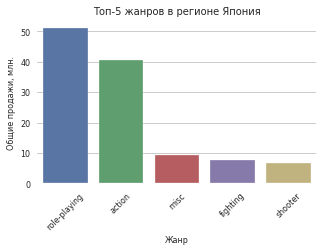

Доля продаж


,genre,jp_sales,ratio
0,role-playing,51.04,0.44
1,action,40.49,0.35
2,misc,9.20,0.08
3,fighting,7.65,0.07
4,shooter,6.61,0.06


In [50]:
for region in region_dict.keys():
    genre_region(region)

В Америке и Европе игроки имеют одинаковые вкусы по жанрам, разве что европейцы больше отдают предпочтение жанру Racing, чем Misc, хотя у американцев наоборот. 
Японце больше любят игры жанров Role-playing и Action. Доля продаж остальных жанров в Японии значительно меньше.

### "Влияет ли рейтинг ESRB на продажи в отдельном регионе?"

Рейтинг ESRB:
 * «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
 * «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. 
 * «T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
 * «M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
 
Заполним пропуски в столбце `rating` значением `no_rating`. 

Это значение ,в большинстве своих случаев, говорит о том, что:
* издатель не отправлял заявку на получение рейтинга, что маловероятно, так как законы почти каждой страны имеют пункты о присвоении возрастного рейтинга различным видам продуктов и обойти эти законы не так просто;
* издатель не пользовался услугами организации ESRB для присвоения рейтинга, а воспользовлся услугами другой организации, что более вероятно.

In [51]:
df_games_current['rating'] = df_games_current['rating'].fillna('no_rating') 

In [52]:
def rating_region(region):

    reg_rating = df_games_current.pivot_table(index = 'rating', 
                                           values = region, 
                                           aggfunc = 'sum').reset_index().sort_values(by = region,
                                                                                      ascending = False)
    reg_rating = reg_rating.reset_index(drop = True)

    sns.set_style('whitegrid')
    plt.figure(figsize = (5,3))

    plt.title('Распределение продаж по возрастному рейтингу ESRB в регионе {}'.format(region_dict[region]), fontsize = 10)

    sns.barplot(x = 'rating', y = region, data = reg_rating)

    plt.xlabel('Рейтинг ESRB', fontsize = 8)
    plt.ylabel('Общие продажи, млн.', fontsize = 8)

    plt.xticks(rotation = 45, fontsize = 8)
    plt.yticks(rotation = 'horizontal', fontsize = 8)
    
    plt.show()
    
    reg_rating['ratio'] = round(reg_rating[region] / reg_rating[region].sum(), 2)
    
    print('Доля продаж')
    
    display(reg_rating)
    
    print('=============================================')

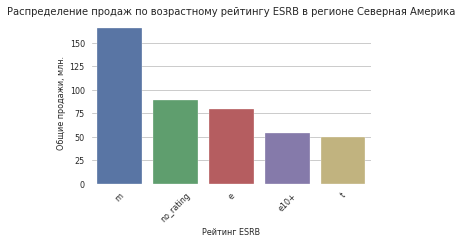

Доля продаж


,rating,na_sales,ratio
0,m,165.21,0.38
1,no_rating,89.42,0.20
2,e,79.05,0.18
3,e10+,54.24,0.12
4,t,49.79,0.11


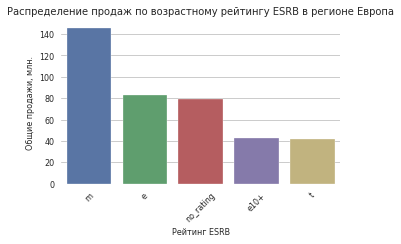

Доля продаж


,rating,eu_sales,ratio
0,m,145.32,0.37
1,e,83.36,0.21
2,no_rating,78.91,0.20
3,e10+,42.69,0.11
4,t,41.95,0.11


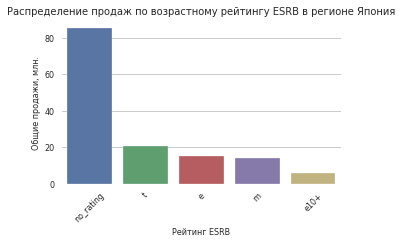

Доля продаж


,rating,jp_sales,ratio
0,no_rating,85.05,0.60
1,t,20.59,0.15
2,e,15.14,0.11
3,m,14.11,0.10
4,e10+,5.89,0.04


In [53]:
for region in region_dict.keys():
    rating_region(region)

Распределение доль продаж в Северной Америке и Европе практически идеально совпадают. Игроки в этих регионах больше предпочитают игры с рейтингом "M", доля которых составляет практически половину от всех игр. Далее идут игры с рейтингом "E", которыt составляют около четверти от всех игр. Оставшуюся долю делят пополам игры с рейтингом "E10+" и "T".

В Японии совсем другая ситуация. Игры с жестоким рейтингом "M" составляют всего четверть от общей доли наравне с играми с рейтингом "E". Наиболее популярны игры с жанром "T". Их доля 37%. На последнем месте по популярности находятся игры с жанром "E10+".

Такая разница между западом и востоком обусловлена культурными различиями и предпочтениями. В Японии более строже следят за возрастным рейтингом игр, чем в других регионах.

Большее количество игр с неопределенным возрастным рейтингом присутствует в японском регионе. Это можно объяснить тем, что японская игровая индустрия в основном пользуется услугами организации Computer Entertainment Rating Organization(CERO) для присвоения возрастного рейтинга. А так как таких игр без рейтинга в Японии много, то можно сделать вывод, что японцы делают игры в основном для себя и популярность этих игр иногда выходит за пределы региона, что видно по размещению игр с таким рейтингом в двух остальных регионах далеко не на последнем месте.

## Проверка гипотез

### "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сделаем срез данных по заданным критериям, удалив при этом пустые значения.

In [54]:
xone = df_games_current[df_games_current['platform'] == 'xone']['user_score'].dropna().reset_index(drop=True)
pc = df_games_current[df_games_current['platform'] == 'pc']['user_score'].dropna().reset_index(drop=True)

Сформулируем нулевую гипотезу $H_{0}$:
 * средние пользовательские рейтинги платформ Xbox One и PC равны.

Значит альтернативная гипотеза $H_{1}$:
 * средние пользовательские рейтинги платформ Xbox One и PC не равны.
 
Уровень статистической значимости примем как 5%.

In [55]:
alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Мы не можем сказать, что средние пользовательские рейтинги различаются. Если бы мы приняли альтернативную гипотезу, то мы бы ошиблись с вероятностью в 14,7%.

Проверим результат, посчитав статистические показатели.

In [56]:
print('Сатистические показатели пользовательского рейтинга платформы Xbox One')

print('Среднее арифметическое: {:.2f}'.format(xone.mean()))
print('Медиана: {:.2f}'.format(xone.median()))
print('Дисперсия: {:.2f}'.format(np.var(xone)))
print('Среднее отклонение: {:.2f} \n'.format(np.std(xone)))
    
print('Сатистические показатели пользовательского рейтинга платформы PC')


print('Среднее арифметическое: {:.2f}'.format(pc.mean()))
print('Медиана: {:.2f}'.format(pc.median()))
print('Дисперсия: {:.2f}'.format(np.var(pc)))
print('Среднее отклонение: {:.2f} \n'.format(np.std(pc)))

Сатистические показатели пользовательского рейтинга платформы Xbox One
Среднее арифметическое: 6.52
Медиана: 6.80
Дисперсия: 1.90
Среднее отклонение: 1.38 

Сатистические показатели пользовательского рейтинга платформы PC
Среднее арифметическое: 6.27
Медиана: 6.80
Дисперсия: 3.02
Среднее отклонение: 1.74 



Средние арифметические близки по своим значениям.

### "Средние пользовательские рейтинги жанров Action и Sports разные"

Сделаем срез данных по заданным критериям, удалив при этом пустые значения.

In [57]:
action = df_games_current[df_games_current['genre'] == 'action']['user_score'].dropna().reset_index(drop=True)
sports = df_games_current[df_games_current['genre'] == 'sports']['user_score'].dropna().reset_index(drop=True)

Сформулируем нулевую гипотезу $H_{0}$:
 * средние пользовательские рейтинги жанров Action и Sports равны.

Значит альтернативная гипотеза $H_{1}$:
 * средние пользовательские рейтинги жанров Action и Sports не равны.
 
Уровень статистической значимости примем как 5%.

In [58]:
alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Cредние пользовательские рейтинги жанров Action и Sports не равны.

Проверим результат, посчитав статистические показатели.

In [59]:
print('Сатистические показатели пользовательского рейтинга игр с жанром Action')

print('Среднее арифметическое: {:.2f}'.format(action.mean()))
print('Медиана: {:.2f}'.format(action.median()))
print('Дисперсия: {:.2f}'.format(np.var(action)))
print('Среднее отклонение: {:.2f} \n'.format(np.std(action)))
    
print('Сатистические показатели пользовательского рейтинга игр с жанром Sports')


print('Среднее арифметическое: {:.2f}'.format(sports.mean()))
print('Медиана: {:.2f}'.format(sports.median()))
print('Дисперсия: {:.2f}'.format(np.var(sports)))
print('Среднее отклонение: {:.2f} \n'.format(np.std(sports)))

Сатистические показатели пользовательского рейтинга игр с жанром Action
Среднее арифметическое: 6.84
Медиана: 7.10
Дисперсия: 1.76
Среднее отклонение: 1.33 

Сатистические показатели пользовательского рейтинга игр с жанром Sports
Среднее арифметическое: 5.24
Медиана: 5.50
Дисперсия: 3.16
Среднее отклонение: 1.78 



Дейсвительно, средние арифметические сильно отличаются.

## Вывод

Исходя из анализа данных можно сказать следующее:

* динамика выпуска игр на 2016 год сильно меньше в сравнении с 2008 и 2009 годами. Происследовав данные с 1980 по 2016 год именно в 2008 и 2009 годах игры выпускались в большем количестве. Скорее всего это связано с увеличением бюджета игр и с тем, что у людей появилось больше способов разнообразить свой досуг(социальные медиа, например);

* наиболее популярными платформами за весь исследуемый период являются:
    * PS2;
    * X360;
    * PS3;
    * Wii;
    * DS;
    * PS.
* средняя продолжительность жизни платформ примерно равна 10 годам. Исходя из этого были выбран актуальный период 2013-2016. Именно в 2013 году вышла одна из самых прибыльных платформ - PS4. В этот же список входят платформы Xbox One и 3DS. При планировании закупок и продумывании рекламных кампаний на будующее лучше ориентироваться на эти платформы;
* покупатели больше доверяют оценкам критиков, чем самих пользователей;
* наиболее популярными жанрами являются Action, Sports и Shooter.
* при планировании кампаний в различных регионах следует обращать внимание на предпочтения покупателей в них, так как сильно различатеся картина по платформам и жанрам между западными и восточными регионами. Также стоит учитывать, как в этих странах относятся к возрастному рейтингу игр. Например, в Японии довольно резко воспринимаются игры со взрослым рейтингом.
* хоть игры жанра Action и обладают большим объемом продаж в сравнении с другими популярными жанрами, они достигают его за счет большого количества выпущенных игр и за счет большего количества бестселлеров. Игры жанра Sports Shooter имеют более значительные границы по объему продаж;
* необходимо описать предпочтения в каждом регионе:
    * топ-3 платформ:
        * топ-3 платформ в Северной Америке: PS4, Xbox One, Xbox 360;
        * топ-3 платформ в Европе: PS4, PS3, Xbox One. Причем доля продаж игр на PS4 существенно больше остальных;
        * топ-3 платформ в Японии: 3DS, PS3, PSV. Доля продаж 3DS намного больше остальных платформ. Там больше покупают портативные консоли и пользуются в большинстве своем платформами собственного производства.
    * топ-3 жанров:
        * топ-3 жанров в Северной Америке и Европе: Action, Shooter, Sports;
        * топ-2 жанров в Японии: Role-playing, Action. Игры остальных жанров составляют довольно малую долю продаж.
    * топ-3 возрастных рейтингов:
        * топ-3 возрастных рейтнгов в Северной Америке и Европе: M, E, E10+. Причем игры без установленного рейтинга составляют существенную долю продаж;
        * топ-3 возрастных рейтингов в Японии: T, E, M. Но доля продаж даже вместе взятых игр с этим рейтингом существенно мала по сравнению с играми без возрастного рейтинга, потому что японцы пользуются услугами своих организаций для определения возрастных рейтингов.

Также можно сделать вывод, что японская индустрия больше влияет на западную, чем западная на японскую.